In [1]:
import numpy as np
from matplotlib import pyplot as plt
from bosonicplus.plotting import plot_wigner_marginals

In [2]:
hbar = 2

In [3]:
def gkp_pauli_operator(k : int, eps : float,cutoff=1e-10):
    """Generate the coefficients, means and covariance of the GKP Pauli operator given in 
    the Appendix of https://doi.org/10.1103/PhysRevA.108.052413

    m1 and m2 flipped compared to his definition

    The sum of Gaussians is divided into a sum of Gaussians in x times a sum of Gaussians in p

    Args:
        k : which Pauli operator
        eps : fock damping strength
        cutoff : max coefficient value

    Returns:
        cx, mux : coefficients and means in x 
        cp, mup : coefficients and means in p 
        cov : (shared) covaraince mat
        
    """
    cov = hbar/2*np.tanh(eps)*np.eye(2)
    m_max = int(np.sqrt(-np.log(cutoff)*4/np.pi/np.tanh(eps)))
    
    if k == 0:
        s1 = 1
        s2 = 1
        #Range of even integers values, m1, m2 even
        if m_max%2 == 1: 
            m1 = np.arange(-m_max-1,m_max+2,2)
            m2 = np.arange(-m_max-1,m_max+2,2)
        elif m_max %2 == 0:
            m1 = np.arange(-m_max,m_max+2,2)
            m2 = np.arange(-m_max,m_max+2,2)

    elif k == 1:
        s1 = 1
        #m1 odd, m2 even
        if m_max%2 == 1:
            m1 = np.arange(-m_max,m_max+2,2)
            m2 = np.arange(-m_max-1,m_max+2,2)
        elif m_max %2 == 0:
            m1 = np.arange(-m_max-1,m_max+2,2)
            m2 = np.arange(-m_max,m_max+2,2)
        s2 = (-1)**(m2/2)
        
    elif k == 2:
        #m1 odd, m2 odd
        if m_max%2 == 1:
            m1 = np.arange(-m_max,m_max+2,2,dtype=complex)
            m2 = np.arange(-m_max,m_max+2,2,dtype=complex)
        elif m_max%2 == 0:
            m1 = np.arange(-m_max-1,m_max+2,2,dtype=complex)
            m2 = np.arange(-m_max-1,m_max+2,2,dtype=complex)
            
        
        s1 = (-1)**(m1/2)
        s2 = -(-1)**(m2/2)
    elif k == 3:
        s2 = 1
        #m1 even, m2 odd
        if m_max%2 == 1:
            m1 = np.arange(-m_max-1,m_max+2,2)
            m2 = np.arange(-m_max,m_max+2,2,dtype=complex)
        elif m_max%2 == 0:
            m1 = np.arange(-m_max,m_max+2,2)
            m2 = np.arange(-m_max-1,m_max+2,2,dtype=complex)
            
        s1 = (-1)**(m1/2)
            
    cx = np.exp(-np.tanh(eps)*np.pi/4*m2**2)*s2
    cp = np.exp(-np.tanh(eps)*np.pi/4*m1**2)*s1

    mux = 1/np.cosh(eps)*np.sqrt(np.pi/2)*np.sqrt(hbar/2)*m2
    mup = 1/np.cosh(eps)*np.sqrt(np.pi/2)*np.sqrt(hbar/2)*m1

    return cx, mux, cp, mup, cov


In [4]:
def gkp_pauli_state(a, eps, cutoff = 1e-10):
    """Generate a state in the GKP subspace, Eq. 4 of https://doi.org/10.1103/PhysRevA.108.052413
    
    The sum of Gaussians is divided into a sum of Gaussians in x times a sum of Gaussians in p
    
    Args: 
        a: [1, a1, a2, a3], where [a1, a3, a3] is the Pauli vector
        eps: fock damping strength
        
    Returns:
        cx, mux : up to 4 coefficients and means in x 
        cp, mup : up to 4 coefficients and means in p 
        cov : (shared) covaraince mat
    """
    cx = []
    mux = []
    cp = []
    mup = []
    
    for i, b in enumerate(a): 
        if b!= 0:
            ckx, mukx, ckp, mukp, cov = gkp_pauli_operator(i,eps,cutoff)
            cx.append(ckx)
            mux.append(mukx)
            cp.append(ckp)
            mup.append(mukp)
        else:
            cx.append([])
            mux.append([])
            cp.append([])
            mup.append([])
            
    return cx, mux, cp, mup, cov
    

In [5]:
def single_mode_gauss(x,p, cx, mux, cp, mup, cov):
    norm = 1/np.sqrt(2*np.pi*np.linalg.det(cov))
    
    covx = cov[0,0]
    covp = cov[1,1]
    
    G1 = cx*np.exp(-0.5*covx**(-1)*(x-mux)**2)
    G2 = cp*np.exp(-0.5*covp**(-1)*(p-mup)**2)

    return norm * np.sum(G1)*np.sum(G2)


In [34]:
#a = [1,1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]

a = [1,0,1,0]
cx, mux, cp, mup, cov = gkp_pauli_state(a, 0.379,1e-10)
#Coefficients aren't multiplied by a
print('Gaussians in total:')
for i in cx:
    print(len(i))
for k in cp:
    print(len(k))
print(cx)
print(cp)
#Up to 4 * 2*m_max Gaussians, which is less than 4 * (2*m_max) **2 

Gaussians in total:
11
0
10
0
11
0
10
0
[array([4.54878617e-13, 1.26198192e-08, 3.60447807e-05, 1.05989607e-02,
       3.20860179e-01, 1.00000000e+00, 3.20860179e-01, 1.05989607e-02,
       3.60447807e-05, 1.26198192e-08, 4.54878617e-13]), [], array([-5.54777372e-26+1.00668912e-10j,  3.84103003e-22-8.96125439e-07j,
       -2.51434426e-19+8.21247160e-04j,  1.42335328e-17-7.74837439e-02j,
       -4.60850233e-17+7.52625546e-01j, -4.60850233e-17-7.52625546e-01j,
        1.42335328e-17+7.74837439e-02j, -2.51434426e-19-8.21247160e-04j,
        3.84103003e-22+8.96125439e-07j, -5.54777372e-26-1.00668912e-10j]), []]
[array([4.54878617e-13, 1.26198192e-08, 3.60447807e-05, 1.05989607e-02,
       3.20860179e-01, 1.00000000e+00, 3.20860179e-01, 1.05989607e-02,
       3.60447807e-05, 1.26198192e-08, 4.54878617e-13]), [], array([ 5.54777372e-26-1.00668912e-10j, -3.84103003e-22+8.96125439e-07j,
        2.51434426e-19-8.21247160e-04j, -1.42335328e-17+7.74837439e-02j,
        4.60850233e-17-7.52625546e-

In [35]:
q = np.linspace(-10,10,200)
W = np.zeros((200,200),dtype=complex)
norm = 0
for k, ckx in enumerate(cx):
    norm += np.sum(cx[k])*np.sum(cp[k])
    for i,x in enumerate(q):
        for j,p in enumerate(q):
            W[i,j] += a[k]*single_mode_gauss(x,p,cx[k],mux[k],cp[k],mup[k],cov)

In [38]:
print(np.tanh(0.379))

0.36183870946962055


In [36]:
norm

np.complex128(2.7655370487802062-1.1077258202765192e-33j)

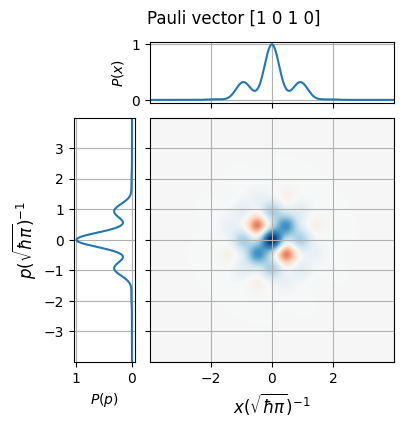

In [37]:
plot_wigner_marginals(W/norm,q,q,f'Pauli vector {np.round(a,2)}')
plt.show()

In [84]:
np.sum(W/norm)*np.diff(q)[0]**2

np.complex128(2.506628274631+0j)

In [85]:
np.sqrt(np.pi*2)

np.float64(2.5066282746310002)

In [340]:
from bosonicplus.base import State

In [ ]:
def project_gkp_bell(state, eps, eta):

    data = gkp_pauli_state([1,1,1,1],eps)

    cx, mux, cp, mup, cov = data
    

    


    
    
    